### Linear Regression (Supervised Learning --> continous variable)
### Importance of Linear Regression used to predict the value using the other variable
### The variable which are used to predict we call dependent variable 
###  The variable which we are using to predict the other variable's value is called the independent variable.
### Prefect in this concept :cost function,gradient descent,convergent algorithm

## new Topic Multicollinearity  --> when one or more indepedent variable are high correlated to each other  This can lead to unstable estimates, unreliable p-values, and difficulty in interpreting the model's coefficient

### AIM:responsible for developing a linear regression model to predict "medical insurance costs---> df[charges]"
## using the features from the datasets

In [62]:
#Load the libraries 
import numpy as np
import pandas as pnd
import matplotlib.pyplot as mpt
import seaborn as sns

In [8]:
#load the dataset
dataframe=pnd.read_csv("Lab7_Linear_reg_insurance.csv")
print(dataframe)
print(dataframe.dtypes) # each column values datatype

      age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]
age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object


In [9]:
#get the columnName
col_Name=dataframe.columns
print(col_Name)
for x in col_Name:
    print(x)

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')
age
sex
bmi
children
smoker
region
charges


## Task 1: Data Preprocessing
### 1.1 Handle Missing Data: Identify and treat any missing values in the dataset by either removing them or imputing appropriate values(Mean/Median/Mode Imputation).
### 1.2 Encode Categorical Variables: Convert categorical features such as 'sex','smoker', and 'region' into numerical formats using techniques like one-hot encoding or label encoding.
### 1.3 Scaling/Normalizing Features: Apply feature scaling (if necessary) to continuous variables like age, BMI, and children for better model performance.

In [11]:
# 1.1
print(dataframe)
print(dataframe.size)
print(dataframe.shape)
print(dataframe.head(10))
print(dataframe.tail(12))
print(dataframe.sample(6))

      age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]
9366
(1338, 7)
   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770      

In [12]:
dataframe.isnull().sum() #no missing values
d=dataframe.select_dtypes(include='object').columns.unique()
for column in d:
    print(dataframe[column].unique())

['female' 'male']
['yes' 'no']
['southwest' 'southeast' 'northwest' 'northeast']


In [13]:
# #1.2 encoder categorical
# #One-hot encoding: Suitable for categorical variables with a small number of unique categories.
# #Label encoding: Suitable for "ordinal categorical variables" where the categories have a natural order.

# print(dataframe.info())

# # selecting only entity columns with object as its data type
categorical_columns = dataframe.select_dtypes(include='object').columns.tolist() #in the form of the list

# #print(categorical_columns)

# # One-hot encode the selected columns
# df_encoded = pnd.get_dummies(dataframe, columns=categorical_columns)
# print(df_encoded)


In [14]:
print(dataframe)

      age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]


In [15]:
#since the above code having the ordinal data let go with the label encoding
from sklearn.preprocessing import LabelEncoder as lb_encod
for column in categorical_columns:
    le = lb_encod()
    dataframe[column + '_encoded'] = le.fit_transform(dataframe[column])
print(dataframe)
# Drop the original categorical columns if desired
df_encoded=dataframe.drop(categorical_columns, axis=1, inplace=True)

print(df_encoded)


      age     sex     bmi  children smoker     region      charges  \
0      19  female  27.900         0    yes  southwest  16884.92400   
1      18    male  33.770         1     no  southeast   1725.55230   
2      28    male  33.000         3     no  southeast   4449.46200   
3      33    male  22.705         0     no  northwest  21984.47061   
4      32    male  28.880         0     no  northwest   3866.85520   
...   ...     ...     ...       ...    ...        ...          ...   
1333   50    male  30.970         3     no  northwest  10600.54830   
1334   18  female  31.920         0     no  northeast   2205.98080   
1335   18  female  36.850         0     no  southeast   1629.83350   
1336   21  female  25.800         0     no  southwest   2007.94500   
1337   61  female  29.070         0    yes  northwest  29141.36030   

      sex_encoded  smoker_encoded  region_encoded  
0               0               1               3  
1               1               0               2  
2  

In [16]:
### The final dataset
print("the final dataset:",dataframe)

the final dataset:       age     bmi  children      charges  sex_encoded  smoker_encoded  \
0      19  27.900         0  16884.92400            0               1   
1      18  33.770         1   1725.55230            1               0   
2      28  33.000         3   4449.46200            1               0   
3      33  22.705         0  21984.47061            1               0   
4      32  28.880         0   3866.85520            1               0   
...   ...     ...       ...          ...          ...             ...   
1333   50  30.970         3  10600.54830            1               0   
1334   18  31.920         0   2205.98080            0               0   
1335   18  36.850         0   1629.83350            0               0   
1336   21  25.800         0   2007.94500            0               0   
1337   61  29.070         0  29141.36030            0               1   

      region_encoded  
0                  3  
1                  2  
2                  2  
3           

In [51]:
#Scaling/Normalizing Features: Apply feature scaling (if necessary) to
#continuous variables like age, BMI, and children for better model performance.
# gradient descent
# we can use min-max(0-1)z-score(StandardScaler),robust scaling

from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
dataframe[['age','bmi','children']]=scaler.fit_transform(dataframe[['age', 'bmi', 'children']])
x_scaled=scaler.fit_transform(dataframe[['age', 'bmi', 'children']])

print(dataframe)



           age       bmi  children      charges  sex_encoded  smoker_encoded  \
0     0.021739  0.321227       0.0  16884.92400            0               1   
1     0.000000  0.479150       0.2   1725.55230            1               0   
2     0.217391  0.458434       0.6   4449.46200            1               0   
3     0.326087  0.181464       0.0  21984.47061            1               0   
4     0.304348  0.347592       0.0   3866.85520            1               0   
...        ...       ...       ...          ...          ...             ...   
1333  0.695652  0.403820       0.6  10600.54830            1               0   
1334  0.000000  0.429379       0.0   2205.98080            0               0   
1335  0.000000  0.562012       0.0   1629.83350            0               0   
1336  0.065217  0.264730       0.0   2007.94500            0               0   
1337  0.934783  0.352704       0.0  29141.36030            0               1   

      region_encoded  
0               

In [45]:
#model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split 

X = dataframe[['age', 'sex_encoded' ,'smoker_encoded', 'bmi', 'children', 'region_encoded']]
y = dataframe['charges']

# print(X)
# print(y)

# spliting the  data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=40)



In [19]:
import pandas as pnd
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
#from sklearn.linear_model import LinearRegression
#from sklearn.model_selection import train_test_split

# assume 'dataframe' is your dataset
X = dataframe[['age', 'sex_encoded', 'smoker_encoded', 'bmi', 'children', 'region_encoded']]
y = dataframe['charges']

# add a constant term to the independent variables for VIF cal
X_constant = sm.add_constant(X)

# Cal the VIF for each feature
vif = pnd.DataFrame()
vif["VIF"] = [variance_inflation_factor(X_constant.values, i) for i in range(X_constant.shape[1])]
vif["Feature"] = X_constant.columns

print("Variance Inflation Factor before removal:")
print(vif)

# select features with VIF greater than 5, excluding the constant term
#cosnt term:represents the intercept in your regression model.
features_to_remove = vif[(vif['VIF'] > 5) & (vif['Feature'] != 'const')]['Feature'].tolist()
print("Features to remove due to high VIF:", features_to_remove)

#remove selected features from X
X = X.drop(features_to_remove, axis=1)

#splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40)


# Make predictions
y_pred = model.predict(X_test)
print("Predicted values:")
print(y_pred)


Variance Inflation Factor before removal:
         VIF         Feature
0  11.157012           const
1   1.015394             age
2   1.008889     sex_encoded
3   1.006466  smoker_encoded
4   1.040608             bmi
5   1.002482        children
6   1.025966  region_encoded
Features to remove due to high VIF: []
Predicted values:
[ 5.69074233e+03  2.83339369e+04  1.10676779e+04  1.20444624e+04
  2.48291347e+04  7.32524313e+03  1.45513130e+04  3.04518828e+04
  1.17033984e+04  3.17193902e+04  3.33492357e+04  1.20084516e+04
  1.43956683e+04  1.10829413e+04  1.26404237e+04  6.86542154e+03
  6.41954202e+03  3.87994230e+04  3.47337801e+04  8.23772572e+03
  1.24021023e+04  1.82941338e+03  5.71228193e+03  3.25398241e+04
  1.37363530e+04  2.59910468e+04  1.45804471e+04  1.97652428e+03
  6.71848642e+03  8.76899990e+03  3.06783887e+04  9.17513427e+03
  3.17426161e+04  3.63914965e+04  2.35347632e+04  1.01654799e+03
  1.38868199e+04  1.01931869e+04  9.15755582e+03  1.63164051e+04
  7.59457269e+03  1

In [20]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

model.fit(X_train,y_train)

LinearRegression()

In [35]:
# Make predictions
y_pred = model.predict(X_test)
print("Predicted values:")
print(y_pred)

Predicted values:
[ 5.69074233e+03  2.83339369e+04  1.10676779e+04  1.20444624e+04
  2.48291347e+04  7.32524313e+03  1.45513130e+04  3.04518828e+04
  1.17033984e+04  3.17193902e+04  3.33492357e+04  1.20084516e+04
  1.43956683e+04  1.10829413e+04  1.26404237e+04  6.86542154e+03
  6.41954202e+03  3.87994230e+04  3.47337801e+04  8.23772572e+03
  1.24021023e+04  1.82941338e+03  5.71228193e+03  3.25398241e+04
  1.37363530e+04  2.59910468e+04  1.45804471e+04  1.97652428e+03
  6.71848642e+03  8.76899990e+03  3.06783887e+04  9.17513427e+03
  3.17426161e+04  3.63914965e+04  2.35347632e+04  1.01654799e+03
  1.38868199e+04  1.01931869e+04  9.15755582e+03  1.63164051e+04
  7.59457269e+03  1.31443563e+04  8.42635143e+03  8.05554561e+03
  9.23520345e+02  1.02047216e+04  3.75671639e+03  2.77846046e+04
  6.37834601e+03  1.01945489e+04  1.41936846e+04  2.50400687e+04
  8.73764143e+03  1.15981913e+04  9.22880936e+03  1.25063395e+03
  9.77237010e+03  5.63457729e+03  9.62969964e+03  6.38129543e+03
  4.001

In [39]:
#accuracy checking
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score,explained_variance_score
preds = model.predict(X_test)
r2 = r2_score(preds,y_test)
mae = mean_absolute_error(preds,y_test)
mse = mean_squared_error(preds,y_test)
rmse = np.sqrt(mse)
evs = explained_variance_score(preds,y_test)
print(f"mean Absolute error: {mae}")
print(f"mean Squared error: {mse}")
print(f"r2 score: {r2}")
print(f" Root mean Squared error: {rmse}")
print(f" Explained variance score: {evs}")

mean Absolute error: 4358.130765872681
mean Squared error: 39758624.40753091
r2 score: 0.6249279796329401
 Root mean Squared error: 6305.444029371041
 Explained variance score: 0.6251375874983077


In [54]:
#for adjusted r-squared
# Number of observations and predictors
n = len(y)
p = x_scaled.shape[1]

# Calculate Adjusted R^2
r2_adj = 1 - (1 - r2) * (n - 1) / (n - p - 1)

print(f"Adjusted R^2: {r2_adj:.4f}")

Adjusted R^2: 0.6241


In [56]:
# Predict and calculate residuals
residuals = y_test - preds

# Calculate RSS
rss = (residuals ** 2).sum()
print(f"Residual Sum of Squares: {rss:.4f}")

Residual Sum of Squares: 10655311341.2183


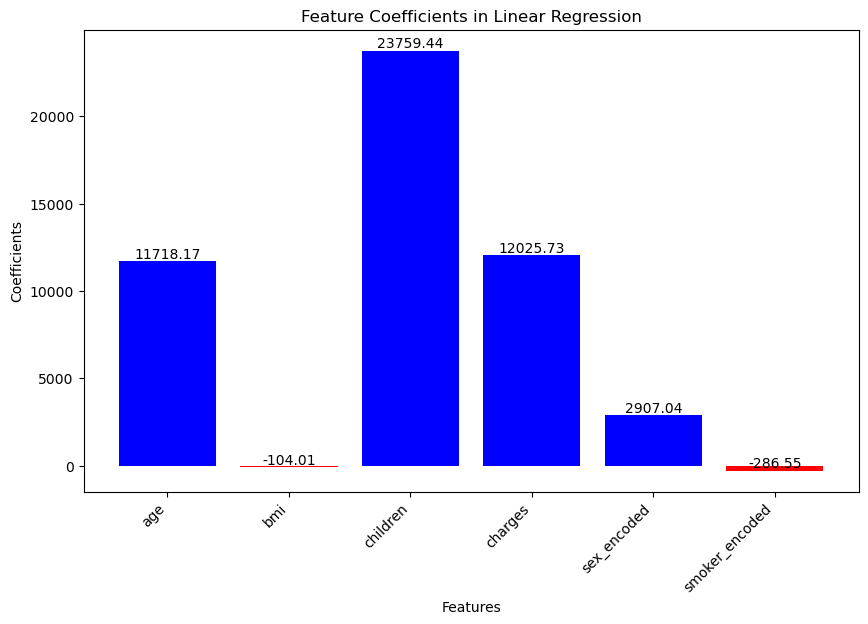

In [66]:
# Get the coefficients from the model
coefficients = model.coef_
features = dataframe.iloc[:,:-1].columns

# Create a bar chart of coefficients
mpt.figure(figsize=(10, 6))
bars = mpt.bar(features, coefficients,color=np.where(coefficients > 0, 'blue', 'red'))
mpt.xlabel('Features')
mpt.ylabel('Coefficients')
mpt.title('Feature Coefficients in Linear Regression')

# Add value labels on bars
for bar in bars:
    height = bar.get_height()
    mpt.text(bar.get_x() + bar.get_width()/2.0, height, f'{height:.2f}', ha='center', va='bottom')

mpt.xticks(rotation=45, ha='right')
mpt.show()

## As we can see from the bar chart , BMI and smoking both contribute to high charges and significantly increases cost

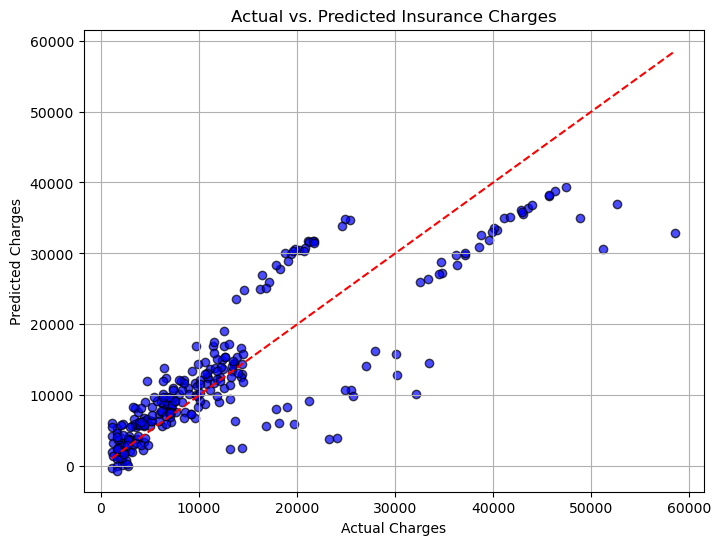

In [68]:
# Create a scatterplot
mpt.figure(figsize=(8, 6))
mpt.scatter(y_test, preds, color='blue', edgecolor='k', alpha=0.7)
mpt.xlabel('Actual Charges')
mpt.ylabel('Predicted Charges')
mpt.title('Actual vs. Predicted Insurance Charges')
mpt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
mpt.grid(True)
mpt.show()

## We can see that the it is the best fit line for the model

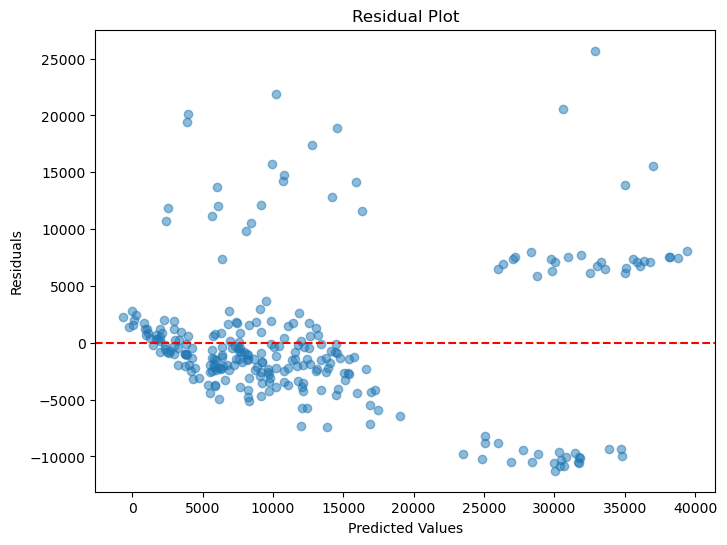

In [70]:
residuals = y_test - preds

# Plot the residuals
mpt.figure(figsize=(8, 6))
mpt.scatter(preds, residuals, alpha=0.5)
mpt.axhline(y=0, color='red', linestyle='--') 
mpt.xlabel('Predicted Values')
mpt.ylabel('Residuals')
mpt.title('Residual Plot')
mpt.show()

#The residual plot is kind of randomized which says the model is fit

## We can see that the it is the best fit line for the model